In [1]:
%matplotlib inline
import datacube
import warnings
warnings.filterwarnings('ignore')  # suppress warnings

dc = datacube.Datacube(app='do-it-yourself')


Failed to resolve driver datacube.plugins.index::default
Error was: ContextualVersionConflict(cligj 0.4.0 (/usr/local/lib/python3.6/dist-packages), Requirement.parse('cligj>=0.5'), {'rasterio'})
Failed to resolve driver datacube.plugins.index::s3aio_index
Error was: ContextualVersionConflict(cligj 0.4.0 (/usr/local/lib/python3.6/dist-packages), Requirement.parse('cligj>=0.5'), {'rasterio'})


In [2]:
datasets = dc.find_datasets(product='alos_palsar_mosaic')

In [3]:
print(len(datasets))

173


In [7]:

# This command here does the loading of data
# Please be patient, it can take some time to load, depending on the size of your study area
# For the example study area, this took 1 minute
data_cube = dc.load(
    product='alos_palsar_mosaic',
    x=(12, 24),
    y=(-6, 6),
    resolution=(-0.01, 0.01)
)
data_cube

<xarray.Dataset>
Dimensions:    (latitude: 1200, longitude: 1200, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2017-07-02T12:00:00
  * latitude   (latitude) float64 5.995 5.985 5.975 ... -5.975 -5.985 -5.995
  * longitude  (longitude) float64 12.01 12.02 12.03 12.04 ... 23.98 23.98 24.0
Data variables:
    hh         (time, latitude, longitude) int16 7476 7461 7465 ... 4524 4974
    hv         (time, latitude, longitude) int16 4087 4147 3900 ... 2176 2633
    date       (time, latitude, longitude) int16 1198 1198 1198 ... 1140 1140
    linci      (time, latitude, longitude) uint8 41 42 40 41 41 ... 36 35 34 35
    mask       (time, latitude, longitude) uint8 255 255 255 255 ... 255 255 255
Attributes:
    crs:      EPSG:4326

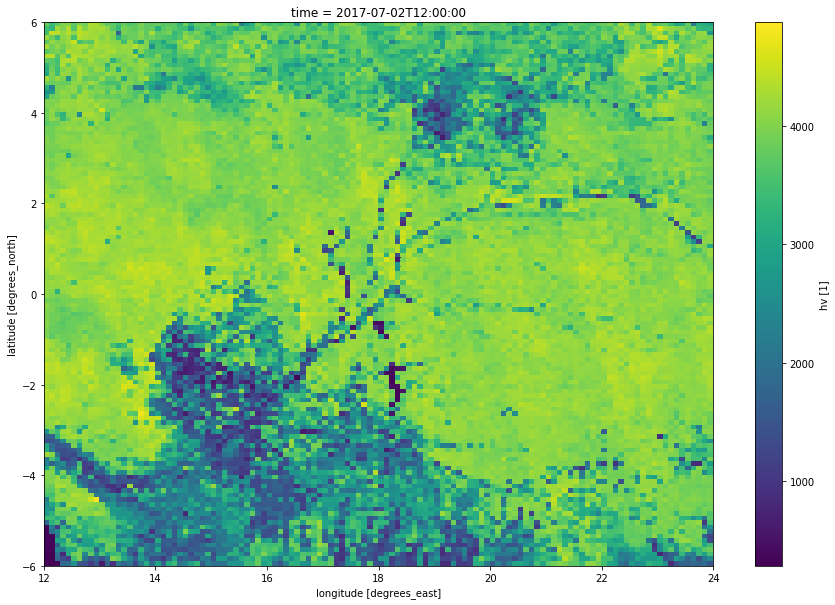

In [6]:
# This will give information on how much data was loaded
# Most interesting is the 'Dimensions' section, that tells you how many timesteps were loaded
# and the x/y resolution of the cube.
data_cube.hv.plot(size=10)

## Plotting data

The next step uses Matplotlib to plot some data. We use a quick function to prepare the data, called `three_band_image`, which will prepare the measurements from the datacube we loaded into something Matplotlib expects. Later, we show another way to plot a simple single-band image.

You should experiment with plotting different timesteps or combinations of bands.

In [11]:
data_cube['hh_hv'] = data_cube.hh / data_cube.hv

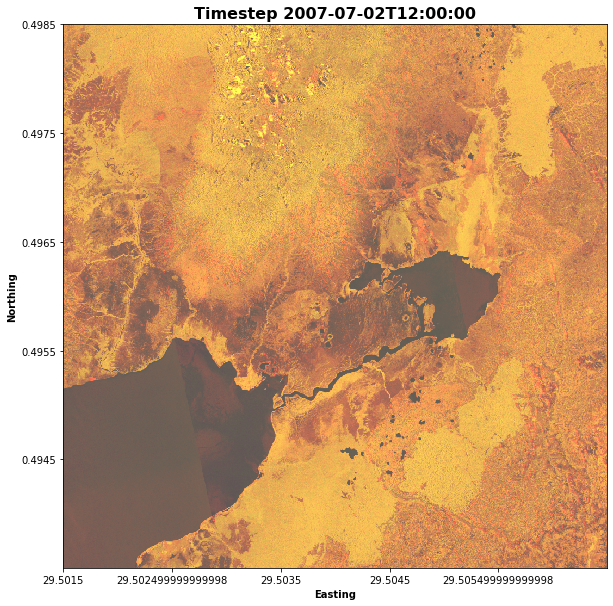

In [12]:
import matplotlib.pyplot as plt

# Note that this import should work if this notebook is either in examples or in the root folder.
try:
    from utils.utils import three_band_image
except ImportError:
    from examples.utils.utils import three_band_image


# Change these!
# You can change the time to anything from 0 to one less than the number of timesteps.
# For example, if there are 6 timesteps, the largest time you can use is 5.
time = 0

# The bands can be any of the bands that we loaded above, so any of:
# 'nbar_red', 'nbar_green', 'nbar_blue', 'nbar_nir_1'
# You can experiment with plotting in false-colour, for example, try ['nbar_nir_1', 'nbar_red', 'nbar_green']
# You can switch between the two band lists specified below or write your own.
bands = ['hh', 'hv', 'hh_hv']
# bands = ['nbar_nir_1', 'nbar_red', 'nbar_green']


# Prepare the image
img_toshow = three_band_image(
    data_cube,
    bands=bands,
    time=time
)
# Format the time string nicely
time_string = str(data_cube.time.isel(time=time).values).split('.')[0]

# And plot it
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title("Timestep {}".format(time_string), fontweight='bold', fontsize=16)
ax.set_xticklabels(data_cube.longitude.values)
ax.set_yticklabels(data_cube.latitude.values)
ax.set_xlabel('Easting', fontweight='bold')
ax.set_ylabel('Northing', fontweight='bold')

plt.imshow(img_toshow)

##  Exporting data
The last task here is to export the data for your study site. You can change the name of the filename so that you know what the file is going to be called. After the file has been created, you can download it from the Jupyter directory it was exported into.

In [ ]:
from datacube import helpers

# You can change this, if you like.
filename = "example.tiff"

helpers.write_geotiff(dataset=data_cube.isel(time=1), filename=filename)

## Stretch goal: Calculate NDVI

If you've come this far and you'd like to do something a bit fancier, you can have a go at calculating the normalised difference vegetation index (NDVI) over your study site. There is a definition of what [NDVI is on Wikipedia](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index).

Basically, you need to use the following formula:

$$
\begin{aligned}
ndvi & = \frac{(nir - red)}{(nir + red)} \\
\end{aligned}
$$
    
Some hints:
 * You can access bands of an Xarray (the data format we're using) with their name, like this: `data_cube.bandname`
 * You can do simple math with bands by simply referring to them, like this: `data_cube.bandname_1 + data_cube.bandname_2`
 * The two band names you're after are `nbar_nir_1`, which is near infra-red, and `nbar_red`, which is red.


In [ ]:
# Calculate NDVI here
ndvi = # Your calculation goes here

# This is the simple way to plot
# Note that high values are likely to be vegetation.
plt.figure(figsize=(10,10))
ndvi.isel(time=1).plot()
plt.show()